In [1]:
from tensorflow import keras

In [2]:
# input layer
# model
# loss function
# train
# functional API
input1 = keras.layers.Input(shape=(28*28*3), name='input')
input2 = keras.layers.Input(shape=(28*28), name='input2')
h1 = keras.layers.Dense(128, name='hidden1')(input1)
h1_cp = keras.layers.Dense(100, name='hidden1_cp')(input2)
h2_before = keras.layers.concatenate([h1, h1_cp])
h2 = keras.layers.Dense(10, name='output', trainable=True)(h2_before)
h2_cp = keras.layers.Dense(1, name='output1',)(h1_cp)
model = keras.Model(inputs=[input1, input2], outputs=[h2, h2_cp])
model.summary()



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 2352)]       0                                            
__________________________________________________________________________________________________
input2 (InputLayer)             [(None, 784)]        0                                            
__________________________________________________________________________________________________
hidden1 (Dense)                 (None, 128)          301184      input[0][0]                      
__________________________________________________________________________________________________
hidden1_cp (Dense)              (None, 100)          78500       input2[0][0]                     
______________________________________________________________________________________________

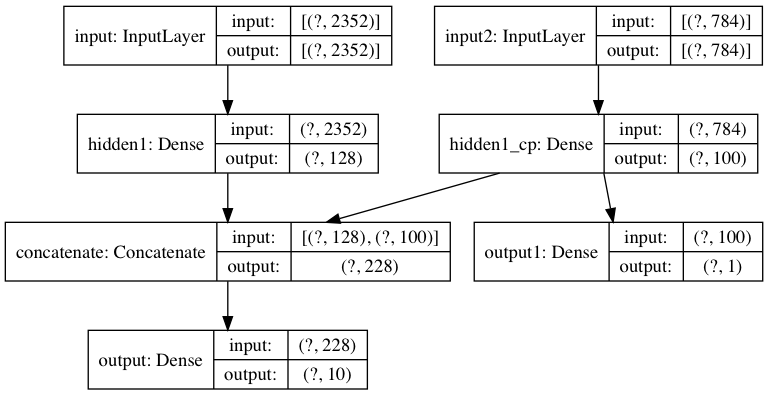

In [3]:
keras.utils.plot_model(model, to_file='good.png', show_shapes=True)

In [4]:
model1 = keras.Sequential(
[keras.layers.Input(shape=(28*28), name='input1'),
keras.layers.Dense(128, activation='relu', name='hid1'),
keras.layers.Dense(10, activation='softmax', name='out'),]
)

In [5]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hid1 (Dense)                 (None, 128)               100480    
_________________________________________________________________
out (Dense)                  (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
# loss
model1.compile(optimizer='sgd', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [7]:
dataset = keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = dataset.load_data()

In [8]:
# 
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [9]:
train_y[0]

9

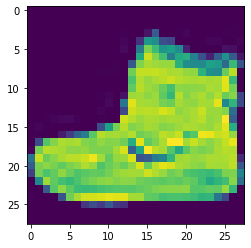

In [10]:
import matplotlib.pyplot as plt
plt.imshow(train_x[0])
plt.show()

In [11]:
import numpy as np
train_x = train_x.reshape(-1, 28*28).astype(np.float32) / 255.
test_x = test_x.reshape(-1, 28*28).astype(np.float32)/255.

In [12]:
# train
results = model1.fit(train_x, train_y, batch_size=32, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.7417 - accuracy: 0.7580
Epoch 2/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.5143 - accuracy: 0.8248
Epoch 3/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4714 - accuracy: 0.8369
Epoch 4/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4465 - accuracy: 0.8458
Epoch 5/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4299 - accuracy: 0.8516
Epoch 6/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4162 - accuracy: 0.8558
Epoch 7/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4045 - accuracy: 0.8587
Epoch 8/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3952 - accuracy: 0.8623
Epoch 9/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3863 - accuracy: 0.8652
Epoch 10/20
60

In [13]:
type(results.history)

dict

In [14]:
results.history.keys()

dict_keys(['loss', 'accuracy'])

In [18]:
loss = results.history['loss']
acc = results.history['accuracy']
# plt.plot(np.arange(len(loss), loss, 'r')
# plt.plot(np.arange(len(loss), acc, 'b')


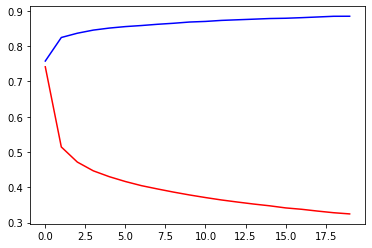

In [23]:
plt.figure()
plt.plot(np.arange(len(loss)), loss, 'r')
plt.plot(np.arange(len(loss)), acc, 'b')
